# Image Classification: 5 Different Modelling Approaches in PyTorch with CIFAR100

This project includes 5 different modelling approaches for image classification problem with CIFAR100 data-set and demonstrates how the power of the models increase as they become deeper. 

### List of Models used: 
 - Basic Logistic Regression
 - Feedforward Neural Network
 - Convolutional Neural Network
 - ResNet9
 - ResNet12

In [1]:
!pip install jovian --upgrade --quiet

In [3]:
project_name = 'my_first_project'

## Libraries

In [2]:
import torch                                                  
import torchvision
#import os
#import tarfile
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
#from torchvision.datasets.utils import download_url
%matplotlib inline

## **Dataset Exploration**

For this project CIFAR100 data-set is used. This data-set consist of 60000 32x32 RGB images, means they have 3 channels, where 50000 of the objects in the data are training images and 10000 are testing images. CIFAR100 has 100 classes and each of those has 600 images, these are separated as 500 training images and 100 testing images. Both the data-set and also above given explanations can be found on: https://www.cs.toronto.edu/~kriz/cifar.html.
(Citation of the Data-set: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.)

In [7]:
dataset = CIFAR100(root = 'data/', download = True, transform = ToTensor())
test_dataset = CIFAR100(root = 'data/', train = False, transform = ToTensor())

Extracting data/cifar-100-python.tar.gz to data/


In [8]:
print(len(dataset))
print(len(test_dataset))

50000
10000


In [9]:
classes = dataset.classes 
print('Number of Classes:', len(classes))
print('Class Names :\n', classes)

Number of Classes: 100
Class Names :
 ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle

In [10]:
#shape of the image tensor
img, label = dataset[31]
img_shape = img.shape
img_shape

torch.Size([3, 32, 32])

In [11]:
print("1 - Max & Min Pixel Values:", "Max:", torch.max(img), "Min:", torch.min(img))
print("2 - Pixel Values for all Channels:\n", img[:, 20:25, 20:25])

1 - Max & Min Pixel Values: Max: tensor(1.) Min: tensor(0.1020)
2 - Pixel Values for all Channels:
 tensor([[[0.5569, 0.6039, 0.6510, 0.6039, 0.8235],
         [0.3961, 0.5922, 0.7529, 0.6824, 0.8314],
         [0.2941, 0.5294, 0.6275, 0.6078, 0.6784],
         [0.3255, 0.4471, 0.4353, 0.4235, 0.4275],
         [0.4667, 0.4667, 0.5020, 0.5725, 0.4706]],

        [[0.4353, 0.4745, 0.5020, 0.4549, 0.6510],
         [0.3020, 0.4706, 0.5882, 0.5098, 0.6706],
         [0.2471, 0.4196, 0.4745, 0.4431, 0.5333],
         [0.2667, 0.3529, 0.3098, 0.2941, 0.3098],
         [0.3922, 0.4039, 0.4196, 0.4902, 0.3922]],

        [[0.4392, 0.4824, 0.5137, 0.4627, 0.6667],
         [0.3020, 0.4745, 0.6000, 0.5216, 0.6745],
         [0.2431, 0.4353, 0.4980, 0.4627, 0.5373],
         [0.2627, 0.3569, 0.3176, 0.2980, 0.3059],
         [0.3490, 0.3490, 0.3647, 0.4314, 0.3333]]])


Label as Number: 17
Label as Name: castle


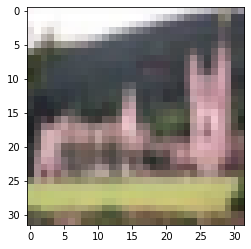

In [12]:
img, label = dataset[31]
plt.imshow(img.permute((1,2,0)))
print('Label as Number:', label)
print('Label as Name:', classes[label])

In [13]:
#number of images in cla
#classes_elem = {}
#for idx, value in enumerate(dataset):
#    value = classes[dataset[idx][1]]
#    classes_elem[idx] = value
#    break
#print(classes_elem)
    
    
#print(dataset[13])
#print(len(dataset[13][0][3]))
#print(dataset[31][1])

In [4]:
import jovian

<IPython.core.display.Javascript object>

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

## Data Preparation
### Steps:
- Defining the seed for reproducibility, 
- Defining size of the validation & train data
- Setting train and validation split
- Defining the batch size
- Defining the dataloaders
- Visual representation of a batch as a grid

In [16]:
torch.manual_seed(43) # for reproducibility
val_size = 10000
train_size = len(dataset) - val_size

In [17]:
# Random Split and Split of dataset between train and validation, randomness is important to have in the data! for performance of the model! that it sees everything during learning!
train_ds, val_ds = random_split(dataset,[train_size, val_size])
len(train_ds), len(val_ds)

(40000, 10000)

In [18]:
#Batch Size, i start here by having 64
batch_size = 128

In [19]:
# Defininf Loaders for training process
train_loader = DataLoader(train_ds, batch_size, shuffle = True, num_workers=4, pin_memory =True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory =True)
test_loader = DataLoader(test_dataset, batch_size, num_workers=4, pin_memory =True)

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([128, 3, 32, 32])


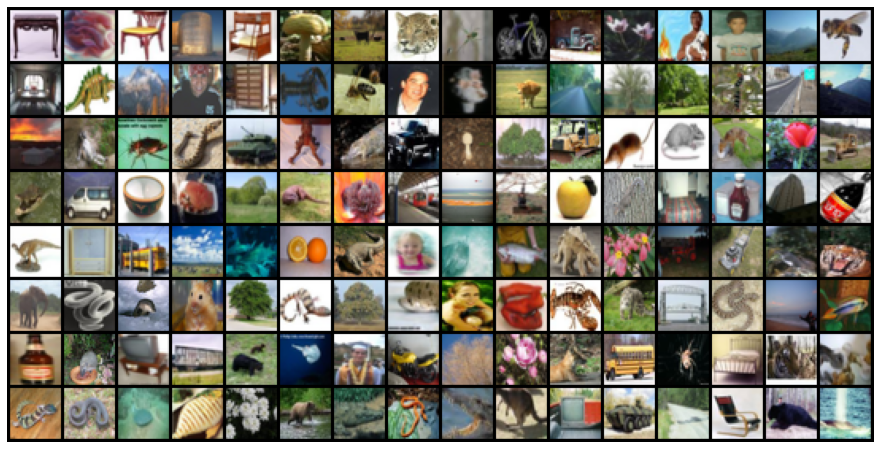

In [20]:
# For visualization purposes, we create our batch grid, to visually check how a batch would look like
for images, _ in train_loader: 
    print('Shape of an Image (Batch Size, RGB, Pixels):', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0))) # we need permute here because matplotlib wants to have the channels as the last dimension
    break

# Settings: GPU, Device and DeviceDataLoaders

In [21]:
# Gpu Choice if Available since i worked on Kaggle I utilized their GPU service
torch.cuda.is_available()

True

In [22]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [23]:
device = get_default_device()
device

device(type='cuda')

In [24]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

# Defining the Base For the Models: Create the Generics


In [26]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [27]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    
        loss = F.cross_entropy(out, labels)   
        acc = accuracy(out, labels)          
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
       
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

## Create the Logistic Regression Model

In [28]:
print(len(classes))
input_size=3*32*32
output_size = len(classes) # of classes
hidden_layer_1 = 1536 # for the feedforward neural network

100


In [29]:
class CIFAR100Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)   
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        
        out = self.linear(out)       
        return out

In [30]:
model_log_reg = to_device(CIFAR100Model(), device)
model_log_reg

CIFAR100Model(
  (linear): Linear(in_features=3072, out_features=100, bias=True)
)

## Training the Models: Evaluate and Fit Fucntions for Logistic Regression Model and Feedforward Neural Network Model

In [31]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD): #SGD defined as an optimizer, that will be changed as well! 
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### Initial results before training:

In [32]:
history_log_reg = [evaluate(model_log_reg, val_loader)]
history_log_reg

[{'val_loss': 4.63681697845459, 'val_acc': 0.010878164321184158}]

### Now the logistic regression model training:

In [33]:
%%time
history_log_reg += fit(15, 1e-1, model_log_reg, train_loader, val_loader)

Epoch [0], val_loss: 4.6179, val_acc: 0.0690
Epoch [1], val_loss: 4.3368, val_acc: 0.0775
Epoch [2], val_loss: 4.5716, val_acc: 0.0806
Epoch [3], val_loss: 4.6688, val_acc: 0.0679
Epoch [4], val_loss: 4.5089, val_acc: 0.0904
Epoch [5], val_loss: 4.2775, val_acc: 0.0979
Epoch [6], val_loss: 4.2714, val_acc: 0.1036
Epoch [7], val_loss: 4.5773, val_acc: 0.0790
Epoch [8], val_loss: 4.5944, val_acc: 0.0662
Epoch [9], val_loss: 4.0910, val_acc: 0.1242
Epoch [10], val_loss: 4.2149, val_acc: 0.1285
Epoch [11], val_loss: 4.2437, val_acc: 0.1203
Epoch [12], val_loss: 4.3950, val_acc: 0.1015
Epoch [13], val_loss: 4.3422, val_acc: 0.0932
Epoch [14], val_loss: 4.2994, val_acc: 0.1158
CPU times: user 12.2 s, sys: 6.81 s, total: 19.1 s
Wall time: 1min 36s


In [34]:
%%time
history_log_reg += fit(10, 1e-2, model_log_reg, train_loader, val_loader)

Epoch [0], val_loss: 3.6593, val_acc: 0.1782
Epoch [1], val_loss: 3.6533, val_acc: 0.1829
Epoch [2], val_loss: 3.6563, val_acc: 0.1805
Epoch [3], val_loss: 3.6567, val_acc: 0.1835
Epoch [4], val_loss: 3.6571, val_acc: 0.1798
Epoch [5], val_loss: 3.6527, val_acc: 0.1826
Epoch [6], val_loss: 3.6531, val_acc: 0.1847
Epoch [7], val_loss: 3.6546, val_acc: 0.1863
Epoch [8], val_loss: 3.6559, val_acc: 0.1811
Epoch [9], val_loss: 3.6581, val_acc: 0.1786
CPU times: user 8.18 s, sys: 4.57 s, total: 12.7 s
Wall time: 1min 4s


In [35]:
%%time
history_log_reg += fit(5, 1e-3, model_log_reg, train_loader, val_loader)

Epoch [0], val_loss: 3.6418, val_acc: 0.1856
Epoch [1], val_loss: 3.6405, val_acc: 0.1837
Epoch [2], val_loss: 3.6413, val_acc: 0.1838
Epoch [3], val_loss: 3.6410, val_acc: 0.1849
Epoch [4], val_loss: 3.6407, val_acc: 0.1838
CPU times: user 4.08 s, sys: 2.31 s, total: 6.39 s
Wall time: 33.3 s


### Plotting the History of Logistic Model Accuracy and Loss:

In [36]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Number of Epochs');

In [37]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Number of Epochs');

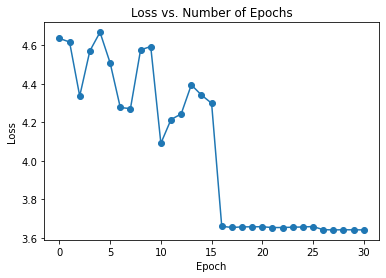

In [38]:
plot_losses(history_log_reg)

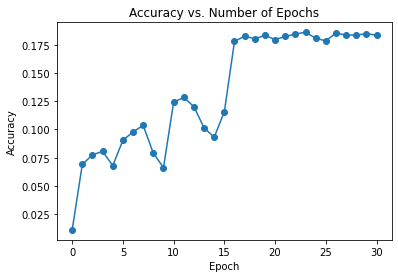

In [39]:
plot_accuracies(history_log_reg)

After 30 epochs in total and with the given learning rates model reaches to 18% accuracy. In addition to that, these results also shows the limits of this model with those given epoch numbers and learning rates. Because as it can be seen also from the results, model does not improve further than 18% accuracy. In order to improve these results other architecture(s) might be helpful. For that reason in the subsequent sections feedforward neural network, convolutional neural network and ResNet models demonstrated, respectively.

### Final evaluation of logistic regression model with test dataset:

In [40]:
test_log_reg = evaluate(model_log_reg, test_loader) #final evaluation of logistic regression model with test dataset

In [41]:
test_loss_log_reg = test_log_reg['val_loss']
test_acc_log_reg = test_log_reg['val_acc']
print('test_loss_log_reg:', test_log_reg['val_loss'])
print('test_acc_log_reg:', test_log_reg['val_acc'])

test_loss_log_reg: 3.6576597690582275
test_acc_log_reg: 0.18314872682094574


In [42]:
torch.save(model_log_reg.state_dict(), 'basic_log_reg.pth')

In [43]:
#Record Results and Metrics
lr_log_reg = [1e-1, 1e-2, 1e-3]
epochs_log_reg = [15, 10, 5]
jovian.log_hyperparams(archs = 'Basic Logistic Reg',
                       lrs=lr_log_reg, 
                       epochs=epochs_log_reg)
jovian.log_metrics(test_loss=test_loss_log_reg, test_acc=test_acc_log_reg)

[jovian] Hyperparams logged.
[jovian] Metrics logged.


In [44]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

## Create the Feedforward Neural Network Model

In [80]:
class CIFAR100Model(ImageClassificationBase):
    def __init__(self):
        super().__init__() 
        
        #with a hidden layer, as feedforward - neural network
        self.linear1 = nn.Linear(input_size, hidden_layer_1) #hidden layer
        self.linear2 = nn.Linear(hidden_layer_1, output_size) #output layer
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        
        # Apply layers & activation functions  
        out = self.linear1(out)  
        out = F.relu(out)        
        out = self.linear2(out)  
        return out

In [81]:
model_fnn = to_device(CIFAR100Model(), device)

### Initial results before training:

In [82]:
history_fnn = [evaluate(model_fnn, val_loader)]
history_fnn

[{'val_loss': 4.612171173095703, 'val_acc': 0.01068037934601307}]

### Now the feedforward neural network model training:

In [83]:
%%time
history_fnn += fit(15, 1e-1, model_fnn, train_loader, val_loader)

Epoch [0], val_loss: 3.9955, val_acc: 0.0882
Epoch [1], val_loss: 3.8098, val_acc: 0.1095
Epoch [2], val_loss: 3.7865, val_acc: 0.1278
Epoch [3], val_loss: 3.6517, val_acc: 0.1497
Epoch [4], val_loss: 3.6215, val_acc: 0.1622
Epoch [5], val_loss: 3.6948, val_acc: 0.1424
Epoch [6], val_loss: 3.5164, val_acc: 0.1772
Epoch [7], val_loss: 3.4605, val_acc: 0.1839
Epoch [8], val_loss: 3.4419, val_acc: 0.1870
Epoch [9], val_loss: 3.4296, val_acc: 0.1855
Epoch [10], val_loss: 3.4481, val_acc: 0.1880
Epoch [11], val_loss: 3.3908, val_acc: 0.2033
Epoch [12], val_loss: 3.3545, val_acc: 0.2136
Epoch [13], val_loss: 3.3398, val_acc: 0.2162
Epoch [14], val_loss: 3.4075, val_acc: 0.1995
CPU times: user 13.8 s, sys: 6.72 s, total: 20.5 s
Wall time: 1min 37s


In [84]:
%%time
history_fnn += fit(10, 1e-2, model_fnn, train_loader, val_loader)

Epoch [0], val_loss: 3.1665, val_acc: 0.2544
Epoch [1], val_loss: 3.1530, val_acc: 0.2565
Epoch [2], val_loss: 3.1546, val_acc: 0.2569
Epoch [3], val_loss: 3.1469, val_acc: 0.2586
Epoch [4], val_loss: 3.1526, val_acc: 0.2559
Epoch [5], val_loss: 3.1432, val_acc: 0.2594
Epoch [6], val_loss: 3.1453, val_acc: 0.2587
Epoch [7], val_loss: 3.1438, val_acc: 0.2567
Epoch [8], val_loss: 3.1369, val_acc: 0.2609
Epoch [9], val_loss: 3.1351, val_acc: 0.2598
CPU times: user 9.13 s, sys: 4.56 s, total: 13.7 s
Wall time: 1min 4s


In [85]:
%%time
history_fnn += fit(5, 1e-3, model_fnn, train_loader, val_loader)

Epoch [0], val_loss: 3.1269, val_acc: 0.2627
Epoch [1], val_loss: 3.1260, val_acc: 0.2633
Epoch [2], val_loss: 3.1265, val_acc: 0.2634
Epoch [3], val_loss: 3.1263, val_acc: 0.2639
Epoch [4], val_loss: 3.1262, val_acc: 0.2626
CPU times: user 4.58 s, sys: 2.38 s, total: 6.96 s
Wall time: 33.2 s


Here we see that our fnn model reaches more than 18% accuracy in the first 15 Epochs with same learning rate, and also has 25-26% accuracy in the second 10 epoch with the same learning rate and here based on the information available here: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw I got the inspiration of having only 1 hidden layer and also to use 1536 as the size of the hidden layer. However, at the end, it seems that this model also reaches its limits after certain point in time, therefore we are going to use CNN and another optimizer, Adam optimizer, which works better for image classification (Reference for choosing Adam optimzer --> Lecture: https://www.youtube.com/watch?v=TN9fMYQxw4E).

### Plotting the History of Feedforward Neural Network Model Accuracy and Loss:

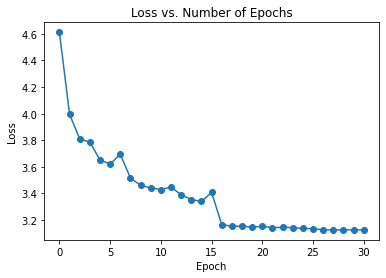

In [86]:
plot_losses(history_fnn)

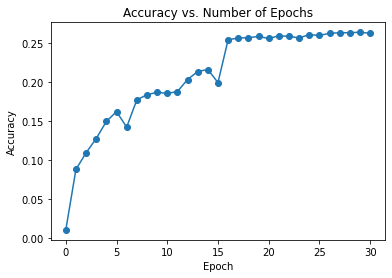

In [87]:
plot_accuracies(history_fnn)

### Final evaluation of fnn model with test dataset:

In [88]:
test_fnn = evaluate(model_fnn, test_loader) #final evaluation of fnn model with test dataset
test_fnn

{'val_loss': 3.12142014503479, 'val_acc': 0.263746052980423}

In [92]:
test_loss_fnn = test_fnn['val_loss']
test_acc_fnn = test_fnn['val_acc']
print('test_loss_fnn:', test_fnn['val_loss'])
print('test_acc_fnn:', test_fnn['val_acc'])

test_loss_fnn: 3.12142014503479
test_acc_fnn: 0.263746052980423


In [89]:
torch.save(model_fnn.state_dict(), 'fnn.pth')

In [93]:
# Clear previously recorded hyperparams & metrics
jovian.reset()

In [94]:
#Record Results and Metrics
archs_fnn = "FNN with 2 layers (1536, 100)"
lr_fnn = [1e-1, 1e-2, 1e-3]
epochs_fnn = [15, 10, 5]
jovian.log_hyperparams(archs=archs_fnn,
                       lrs=lr_fnn, 
                       epochs=epochs_fnn)
jovian.log_metrics(test_loss=test_loss_fnn, test_acc=test_acc_fnn)

[jovian] Hyperparams logged.
[jovian] Metrics logged.


In [95]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

## Create the Convolutional Neural Network (CNN)

Structure is from the cnn lecture:  https://www.youtube.com/watch?v=TN9fMYQxw4E also the notebook reference: https://jovian.ml/aakashns/05-cifar10-cnn

In [96]:
class Cifar100CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 100))
        
    def forward(self, xb):
        return self.network(xb)

Structure is from the cnn lecture, but also we had in that structure --> @torch.nograd, model.eval() and model.train(). Therefore, the fit and evaluation functions for training are defined here once again.

In [97]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [98]:
model_cnn =  to_device(Cifar100CnnModel(), device)
model_cnn

Cifar100CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_feature

### Initial results before training:

In [99]:
history_cnn = [evaluate(model_cnn, val_loader)]
history_cnn

[{'val_loss': 4.605348587036133, 'val_acc': 0.010087025351822376}]

### Now the training of CNN model:

In [100]:
num_epochs_cnn = [10, 5]
opt_func = torch.optim.Adam #now we change also the optimizer
lr_cnn = [1e-3, 1e-4]

In [101]:
%%time
history_cnn += fit(num_epochs_cnn[0], lr_cnn[0], model_cnn, train_loader, val_loader, opt_func)

Epoch [0], val_loss: 4.2773, val_acc: 0.0331
Epoch [1], val_loss: 3.8154, val_acc: 0.1022
Epoch [2], val_loss: 3.4732, val_acc: 0.1611
Epoch [3], val_loss: 3.1801, val_acc: 0.2215
Epoch [4], val_loss: 3.0005, val_acc: 0.2567
Epoch [5], val_loss: 2.8661, val_acc: 0.2843
Epoch [6], val_loss: 2.7604, val_acc: 0.3045
Epoch [7], val_loss: 2.7128, val_acc: 0.3295
Epoch [8], val_loss: 2.6988, val_acc: 0.3319
Epoch [9], val_loss: 2.7343, val_acc: 0.3438
CPU times: user 36.3 s, sys: 8.83 s, total: 45.1 s
Wall time: 1min 24s


In [102]:
%%time
history_cnn += fit(num_epochs_cnn[1], lr_cnn[1], model_cnn, train_loader, val_loader, opt_func)

Epoch [0], val_loss: 2.7611, val_acc: 0.3595
Epoch [1], val_loss: 2.8049, val_acc: 0.3551
Epoch [2], val_loss: 2.8484, val_acc: 0.3587
Epoch [3], val_loss: 2.8830, val_acc: 0.3569
Epoch [4], val_loss: 2.9332, val_acc: 0.3566
CPU times: user 18.3 s, sys: 4.75 s, total: 23.1 s
Wall time: 42.4 s


### Plotting the History of CNN Model Loss and Accuracy:

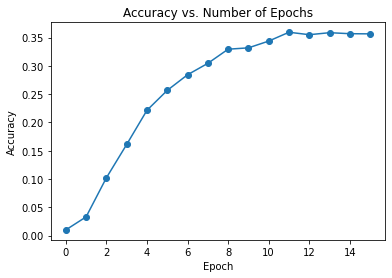

In [103]:
plot_accuracies(history_cnn)

In [104]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bo')
    plt.plot(val_losses, '-ro')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. Number of epochs');

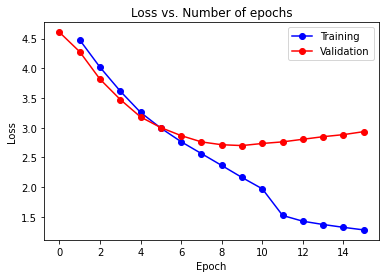

In [105]:
plot_losses(history_cnn)

Here we see that our cnn model reaches to 35% accuracy, which is clearly better than both from logistic regression and feedforward neuralnetwork (fnn) model. Even in comparison to fnn model, cnn model reaches beyond 26% accuracy level even in the first 6 epoch. However, when we plot the losses from the training and validation sets we also see further issues here. As we have also discussed that in the lecture, initially both training and validation losses are decreasing but after some time, even if training loss continues to decrease, the validation loss stops decreasing and even starts to increase again. That is a sign for overfitting problem. To overcome this problem, we can insert more data, use regularization techniques (e.g. Batch Normalization), and we can also stop earlier with training of the model if validation loss starts to increase. (Reference: CNN Lecture: https://jovian.ml/aakashns/05-cifar10-cnn)

With the ResNet model (see below) some of these methods will be applied. After the implementation of the ResNet model we are going to see a substantial increase in the model accuracy.

### Final evaluation of the CNN Model with the test dataset:

In [106]:
test_cnn = evaluate(model_cnn, test_loader) #final evaluation of cnn model with test dataset
test_cnn

{'val_loss': 2.900531053543091, 'val_acc': 0.3710443079471588}

In [107]:
test_loss_cnn = test_cnn['val_loss']
test_acc_cnn = test_cnn['val_acc']
print('test_loss_cnn:', test_cnn['val_loss'])
print('test_acc_cnn:', test_cnn['val_acc'])

test_loss_cnn: 2.900531053543091
test_acc_cnn: 0.3710443079471588


In [108]:
torch.save(model_cnn.state_dict(), 'cnn.pth')

In [109]:
# Clear previously recorded hyperparams & metrics
jovian.reset()

In [110]:
#Record Results and Metrics
lr_cnn = [1e-3, 1e-4]
epochs_cnn = [10, 5]
jovian.log_hyperparams(archs = "CNN",
                       lrs=lr_cnn, 
                       epochs=epochs_cnn)
jovian.log_metrics(test_loss=test_loss_cnn, test_acc=test_acc_cnn)

[jovian] Hyperparams logged.
[jovian] Metrics logged.


In [111]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

## Create ResNet9 Model 

Structure is from the Resnet lecture!  Reference: https://www.youtube.com/watch?v=sJF6PiAjE1M & Also the Notebook Reference: https://jovian.ml/aakashns/05b-cifar10-resnet

In [146]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [147]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

Structure is from the Resnet lecture, but since we have: 

- Learning rate scheduling
- Weight decay
- Gradient clipping

Therefore, the fit and evaluation functions for training are defined here once again.

In [148]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [149]:
model_resnet9 = to_device(ResNet9(3, 100), device)
model_resnet9

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [150]:
history_resnet9 = [evaluate(model_resnet9, val_loader)]
history_resnet9

[{'val_loss': 4.605967998504639, 'val_acc': 0.008208069950342178}]

In [151]:
epochs_resnet9 = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-5
opt_func = torch.optim.Adam

In [152]:
%%time
history_resnet9 += fit_one_cycle(epochs_resnet9, max_lr, model_resnet9, train_loader, val_loader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00279, train_loss: 3.6557, val_loss: 4.2359, val_acc: 0.1300
Epoch [1], last_lr: 0.00760, train_loss: 2.9127, val_loss: 3.0409, val_acc: 0.2666
Epoch [2], last_lr: 0.01000, train_loss: 2.1271, val_loss: 2.4960, val_acc: 0.3601
Epoch [3], last_lr: 0.00950, train_loss: 1.6478, val_loss: 1.9521, val_acc: 0.4847
Epoch [4], last_lr: 0.00812, train_loss: 1.2742, val_loss: 2.0363, val_acc: 0.4864
Epoch [5], last_lr: 0.00611, train_loss: 0.8650, val_loss: 1.7722, val_acc: 0.5424
Epoch [6], last_lr: 0.00389, train_loss: 0.4096, val_loss: 1.6615, val_acc: 0.5897
Epoch [7], last_lr: 0.00188, train_loss: 0.0912, val_loss: 1.5077, val_acc: 0.6431
Epoch [8], last_lr: 0.00050, train_loss: 0.0159, val_loss: 1.4911, val_acc: 0.6527
Epoch [9], last_lr: 0.00000, train_loss: 0.0084, val_loss: 1.4899, val_acc: 0.6528
CPU times: user 1min 39s, sys: 41.8 s, total: 2min 20s
Wall time: 2min 35s


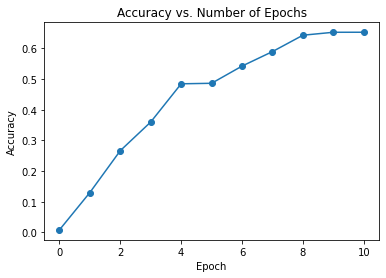

In [153]:
plot_accuracies(history_resnet9)

In [154]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bo')
    plt.plot(val_losses, '-ro')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. Number of epochs');

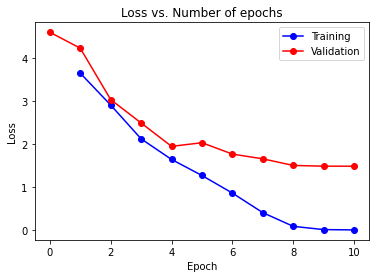

In [155]:
plot_losses(history_resnet9)

In [156]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch Number')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate vs. Batch Number');

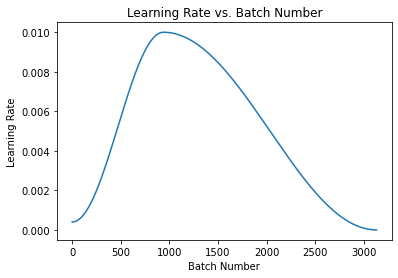

In [157]:
plot_lrs(history_resnet9)

In [158]:
test_resnet9 = evaluate(model_resnet9, test_loader) #final evaluation of resnet9 model with test dataset
test_resnet9

{'val_loss': 1.4880118370056152, 'val_acc': 0.6533821225166321}

In [159]:
test_loss_resnet9 = test_resnet9['val_loss']
test_acc_resnet9 = test_resnet9['val_acc']
print('test_loss_resnet9:', test_resnet9['val_loss'])
print('test_acc_resnet9:', test_resnet9['val_acc'])

test_loss_resnet9: 1.4880118370056152
test_acc_resnet9: 0.6533821225166321


In [160]:
torch.save(model_resnet9.state_dict(), 'ResNet9.pth')

In [161]:
jovian.reset()
jovian.log_hyperparams(archs='resnet9', 
                       epochs=epochs_resnet9, 
                       lrs=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [162]:
jovian.log_metrics(test_loss=test_loss_resnet9, test_acc=test_acc_resnet9)

[jovian] Metrics logged.


In [163]:

jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

In [164]:
def predict_image(img, model_resnet9):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model_resnet9(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: oak_tree , Predicted: maple_tree


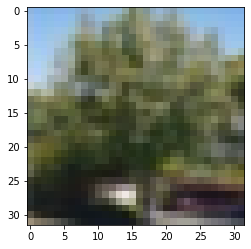

In [165]:
img, label = test_dataset[8543]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Label: shark , Predicted: dolphin


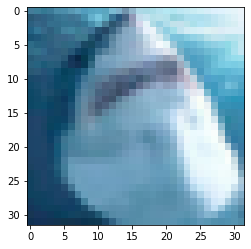

In [166]:
img, label = test_dataset[43]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Label: snail , Predicted: snail


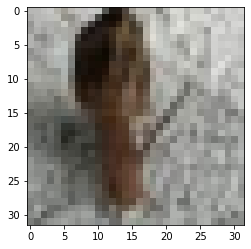

In [167]:
img, label = test_dataset[700]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Label: baby , Predicted: baby


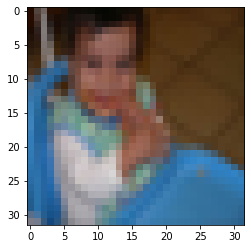

In [168]:
img, label = test_dataset[4560]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_resnet9))

# Resnet Further

In [169]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet12(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.conv5 = conv_block(512, 1024, pool=True)
        self.res3 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), 
                                        nn.Flatten(), 
                                        nn.Linear(1024, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

In [170]:
model_resnet12 = to_device(ResNet12(3, 100), device)
model_resnet12

ResNet12(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=T

In [171]:
history_resnet12 = [evaluate(model_resnet12, val_loader)]
history_resnet12

[{'val_loss': 4.605207443237305, 'val_acc': 0.013548259623348713}]

In [172]:
epochs_resnet12 = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-5
opt_func = torch.optim.Adam

In [173]:
%%time
history_resnet12 += fit_one_cycle(epochs_resnet12, max_lr, model_resnet12, train_loader, val_loader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00279, train_loss: 3.6778, val_loss: 4.6816, val_acc: 0.1349
Epoch [1], last_lr: 0.00760, train_loss: 2.7851, val_loss: 2.9710, val_acc: 0.2673
Epoch [2], last_lr: 0.01000, train_loss: 2.0322, val_loss: 2.7909, val_acc: 0.3163
Epoch [3], last_lr: 0.00950, train_loss: 1.5560, val_loss: 1.9608, val_acc: 0.4844
Epoch [4], last_lr: 0.00812, train_loss: 1.1279, val_loss: 1.8368, val_acc: 0.5153
Epoch [5], last_lr: 0.00611, train_loss: 0.6267, val_loss: 1.7116, val_acc: 0.5619
Epoch [6], last_lr: 0.00389, train_loss: 0.2070, val_loss: 1.6365, val_acc: 0.6154
Epoch [7], last_lr: 0.00188, train_loss: 0.0338, val_loss: 1.5093, val_acc: 0.6457
Epoch [8], last_lr: 0.00050, train_loss: 0.0080, val_loss: 1.5145, val_acc: 0.6503
Epoch [9], last_lr: 0.00000, train_loss: 0.0045, val_loss: 1.5135, val_acc: 0.6505
CPU times: user 3min 23s, sys: 2min 2s, total: 5min 26s
Wall time: 5min 36s


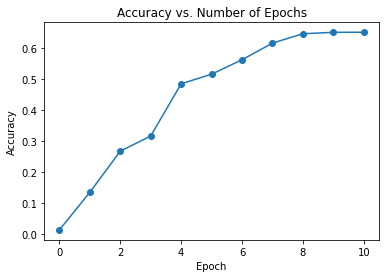

In [174]:
plot_accuracies(history_resnet12)

In [175]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bo')
    plt.plot(val_losses, '-ro')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. Number of epochs');

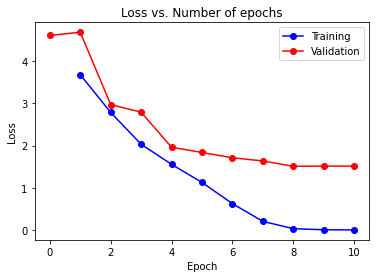

In [176]:
plot_losses(history_resnet12)

In [177]:
test_resnet12 = evaluate(model_resnet12, test_loader) #final evaluation of resnet9 model with test dataset
test_resnet12

{'val_loss': 1.486161708831787, 'val_acc': 0.6527887582778931}

In [178]:
test_loss_resnet12 = test_resnet12['val_loss']
test_acc_resnet12 = test_resnet12['val_acc']
print('test_loss_resnet12:', test_resnet12['val_loss'])
print('test_acc_resnet12:', test_resnet12['val_acc'])

test_loss_resnet12: 1.486161708831787
test_acc_resnet12: 0.6527887582778931


In [179]:
torch.save(model_resnet12.state_dict(), 'ResNet12.pth')

In [180]:
jovian.reset()
jovian.log_hyperparams(archs='resnet12', 
                       epochs=epochs_resnet12, 
                       lrs=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [181]:
jovian.log_metrics(test_loss=test_loss_resnet12, test_acc=test_acc_resnet12)

[jovian] Metrics logged.


## Conculusion

Basic logistic regression, fnn, cnn, resnet9 and resnet12 are employed on the dataset, final accuracy was 65-64% with resnet9 and resnet12 respectively! 

As we can see in the notebook before training we have the following val_loss and val_accuracy: 
- Logistic Regression: {'val_loss': 4.63681697845459, 'val_acc': 0.010878164321184158}
- Feedforwar Neural N: {'val_loss': 4.612171173095703, 'val_acc': 0.01068037934601307}
- Convolutional NN   : {'val_loss': 4.605348587036133, 'val_acc': 0.010087025351822376}
- ResNet9            : {'val_loss': 4.605967998504639, 'val_acc': 0.008208069950342178}
- ResNet12           : {'val_loss': 4.605207443237305, 'val_acc': 0.013548259623348713}

Which are basically quite similar, and we can also see the results based on the test set after model trainings.

Which also shows how model powers are different and results are improved gradually. That said, however, there is still room for further improvement especially with ResNet models, which is mentioned below.

As Future work I would apply data augmentation and channel wise normalization to check whether the resnet model improves further! Since we can see that ResNet9 & ResNet12 stayed at 65% accuracy level for validation set. Therefore, I would consider the data augmentation and channel-wise-normalization as a future work to see the diffrence in the result of the models after those steps!

In [182]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

## Resnet with Channel-Wise-Normalization  & Augmentation

Here I have implemented Channel-Wise-Normalization and Data Augmentation, based on the same informations in the lecture, in order to just initally test the resnet9 model with augmentation and channel-wise-normalization. I also used the same appraoch like in the lecture, which means I have no extra test data, but I have used the test data as validation set. Results did not improve that much, initally I have tried 10 # of epochs with weight_decay 1e-5 and results were quite similar with the models without Channel-Wise-Normalization and Data Augmentation. Then I changed the # of epochs to 8 and with weight_decay to 1e-4 then I got this time 66% accuracy, previously it was 65% with the models without augmentation and Channel-Wise-Normalization. Below you can see the results.

In [213]:
import torchvision.transforms as tt
stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #ImageNet Stats
train_dataset = CIFAR100(root = 'data/', download = False, transform = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'),
                                                                                   tt.RandomHorizontalFlip(),
                                                                                   tt.ToTensor(), tt.Normalize(*stats)]))    #settings taken from ResNet lecture!
val_dataset = CIFAR100(root = 'data/', train = False, transform = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)]))


In [196]:
train_loader_tt = DataLoader(train_dataset, batch_size, shuffle = True, num_workers=4, pin_memory =True)
val_loader_tt = DataLoader(val_dataset, batch_size, num_workers=4, pin_memory =True)

Shape of an Image (Batch Size, RGB, Pixels): torch.Size([128, 3, 32, 32])


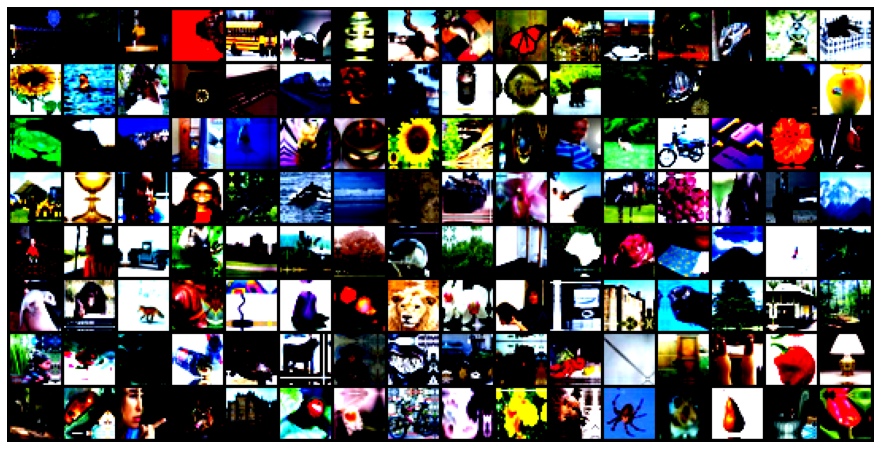

In [197]:
for images, _ in train_loader_tt: 
    print('Shape of an Image (Batch Size, RGB, Pixels):', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0))) 
    break

In [198]:
train_loader_tt = DeviceDataLoader(train_loader, device)
val_loader_tt = DeviceDataLoader(val_loader, device)

In [204]:
model_resnet9_tt = to_device(ResNet9(3, 100), device)
model_resnet9_tt

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [205]:
history_resnet9_tt = [evaluate(model_resnet9_tt, val_loader_tt)]
history_resnet9_tt

[{'val_loss': 4.606367588043213, 'val_acc': 0.010087025351822376}]

In [206]:
# hyperparameters are taken from ResNet lecture!
epochs_resnet9_tt = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [207]:
%%time
history_resnet9_tt += fit_one_cycle(epochs_resnet9_tt, max_lr, model_resnet9_tt, train_loader_tt, val_loader_tt, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00395, train_loss: 3.6756, val_loss: 4.2753, val_acc: 0.1378
Epoch [1], last_lr: 0.00936, train_loss: 2.8654, val_loss: 3.0510, val_acc: 0.2406
Epoch [2], last_lr: 0.00972, train_loss: 2.1307, val_loss: 2.2543, val_acc: 0.4132
Epoch [3], last_lr: 0.00812, train_loss: 1.7454, val_loss: 2.1461, val_acc: 0.4288
Epoch [4], last_lr: 0.00556, train_loss: 1.4245, val_loss: 1.7766, val_acc: 0.5131
Epoch [5], last_lr: 0.00283, train_loss: 1.0271, val_loss: 1.5415, val_acc: 0.5786
Epoch [6], last_lr: 0.00077, train_loss: 0.4726, val_loss: 1.3177, val_acc: 0.6434
Epoch [7], last_lr: 0.00000, train_loss: 0.1304, val_loss: 1.2642, val_acc: 0.6620
CPU times: user 1min 19s, sys: 33.6 s, total: 1min 53s
Wall time: 2min 5s


In [208]:
torch.save(model_resnet9_tt.state_dict(), 'ResNet9_tt.pth')

In [209]:
jovian.reset()
jovian.log_hyperparams(archs='resnet9_tt', 
                       epochs=epochs_resnet9_tt, 
                       lrs=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


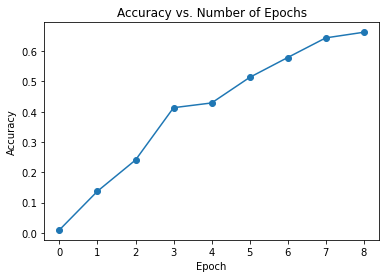

In [210]:
plot_accuracies(history_resnet9_tt)

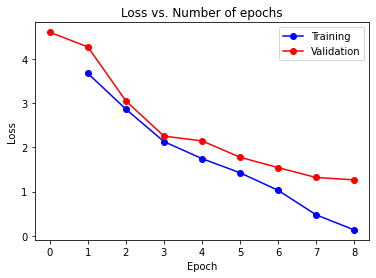

In [211]:
plot_losses(history_resnet9_tt)

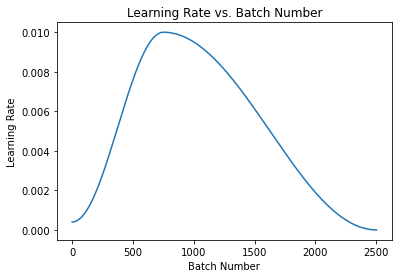

In [212]:
plot_lrs(history_resnet9_tt)

In [215]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/alitabakds/my_first_project


<IPython.core.display.Javascript object>

# Rerefences and Citation: 

- Citation DataSet: 
    - Soruce for CIFAR100: https://www.cs.toronto.edu/~kriz/cifar.html  
    - Citation: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.
- For Convolutional NN: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
- Lecture Notebooks From Aakashns: CNN: https://jovian.ml/aakashns/05-cifar10-cnn Resnet:https://jovian.ml/aakashns/05b-cifar10-resnet
- Videos from Aakashns: CNN:https://www.youtube.com/watch?v=TN9fMYQxw4E Resnet: https://www.youtube.com/watch?v=TN9fMYQxw4E
- For FNN: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw 
- Other Notebooks: 
     - Log Reg: https://jovian.ml/aakashns/03-logistic-regression
     - https://jovian.ml/alitabakds/03-cifar10-feedforward
     
- Overall Lecture notebooks and videos from aakashns and Jovian.ml
- Pytorch documentation: https://pytorch.org/docs/stable/index.html